In [1406]:
import pandas as pd
import numpy as np

import json
import requests
import urllib.parse

import spotipy.util as util

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import PIL.Image
from pylab import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import markovify

In [1002]:
client_id = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'            #<----------------- YOUR ID HERE
    
client_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'        #<----------------- YOUR SECRET HERE

username = 'XXXXXXXXXXX'                                  #<----------------- YOUR USERNAME HERE

scope = 'playlist-modify-public playlist-modify'

redirect_uri = 'https://developer.spotify.com/dashboard/applications/0b03809ce8db4dd785536aad89af792b'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)

# Search for All Podcasts Related to Data Science

In [958]:
# Search Spotify’s catalog for content: 

# The search API now returns podcast shows and episodes. 
# Set the type parameter to show or episode to query these new types of content.



# GET https://api.spotify.com/v1/search 



### Enter a term to search below

In [960]:
# enter term to search here

search = 'data science'

In [959]:
# search endpoint

endpoint_url = "https://api.spotify.com/v1/search?"


In [976]:
# PERFORM THE QUERY

id_list = []
name_list = []
desc_list = []

type = 'show'
market  = 'US'
limit = 50
offset = 0


more_runs = 1
counter = 0  


while(counter <= more_runs):


    query = f'{endpoint_url}'
    query += f'&q={search}'
    query += f'&type={type}'
    query += f'&offset={offset}'
    query += f'&market={market}'
    query += f'&limit={limit}'


    response = requests.get(query, 
                   headers={"Content-Type":"application/json", 
                            "Authorization":f"Bearer {token}"})
    json_response = response.json()


    for i in range(len(json_response['shows']['items'])):

        id_list.append(json_response['shows']['items'][i]['id'])
        name_list.append(json_response['shows']['items'][i]['name'])
        desc_list.append(json_response['shows']['items'][i]['description'])
        
        
    more_runs = (json_response['shows']['total'] // 50 )         
        
    counter += 1
    
    offset = offset + 50 



In [978]:
# set up a dataframe from the lists

podcasts = pd.DataFrame()

podcasts['id'] = id_list
podcasts['name'] = name_list
podcasts['description'] = desc_list

In [979]:
podcasts

,id,name,description
0,63diy2DtpHzQfeNVxAPZgU,Towards Data Science,"Sharing concepts, ideas, and codes"
1,1LaCr5TFAgYPK5qHjP3XDp,Practical AI: Machine Learning & Data Science,"Making artificial intelligence practical, prod..."
2,0kp4abozqxCmILx0lT9foc,The SCP Foundation Database,An immersive audio storytelling series from th...
3,5nrspdHxUxzc9TkEibpxD5,Data Science Now,Data Science Now is a podcast brought to you b...
4,1BZN7H3ikovSejhwQTzNm4,Data Skeptic,Data Skeptic is your source for a perspective ...
...,...,...,...
274,1c5P5abWTtAt8YoRFvwEtD,The AI Saga with Himanshu,Human Stimuli to AI and Beyond. Talk on Artifi...
275,3exqoUpUguDVxFIsoktbh3,Tasos Random Sound Experience,I record random thoughts that I believe are wo...
276,2puy6CmE3kXAr2S5INkfIq,Journey To The Edge Of Machine Learning,This is a learning journal where I record the ...
277,4J6lcgK3QXL4r6Uq6vnK4u,The BTO Podcast,Occasional audio content from the British Trus...


### Get a full list of show ID's to use later

In [980]:
# get a list of all show ids for later

show_list = list(podcasts['id'])

# List All Episodes for One Show

In [765]:
# List episodes for a show: 


# GET https://api.spotify.com/v1/shows/{id}/episodes

In [991]:
# PERFORM THE QUERY

id = '1n8P7ZSgfVLVJ3GegxPat1'       #<------------------------------------ INSERT SHOW ID MANUALLY
type = 'episodes'
market  = 'US'
limit = 50
offset = 0

id_list = []
dur_list = []
date_list = []
name_list = []
desc_list = []

counter = 0
more_runs = 1

while(counter <= more_runs):


    endpoint_url = f"https://api.spotify.com/v1/shows/{id}/episodes?"


    query = f'{endpoint_url}'
    query += f'&q={search}'
    query += f'&type={type}'
    query += f'&offset={offset}'
    query += f'&market={market}'
    query += f'&limit={limit}'


    response = requests.get(query, 
                   headers={"Content-Type":"application/json", 
                            "Authorization":f"Bearer {token}"})
    json_response = response.json()



    for i in range(len(json_response['items'])):

        id_list.append(json_response['items'][i]['id'])
        dur_list.append(json_response['items'][i]['duration_ms'])
        date_list.append(json_response['items'][i]['release_date'])    
        name_list.append(json_response['items'][i]['name'])
        desc_list.append(json_response['items'][i]['description'])
        
        
    more_runs = (json_response['total'] // 50 )         
        
    counter += 1
    
    offset = offset + 50 

In [992]:
# setup a dataframe from the lists

episodes = pd.DataFrame()

episodes['id'] = id_list
episodes['length(ms)'] = dur_list
episodes['date'] = date_list
episodes['name'] = name_list
episodes['description'] = desc_list

In [993]:
episodes

,id,length(ms),date,name,description
0,4qGX4gfGQQSj4EXpVFiSqc,431804,2020-05-15,SDS 366: Define Your Own Success,"Today, I discuss a profound conversation we ha..."
1,39OTtyCRWb9nVdHoSqCkEl,4885629,2020-05-13,SDS 365: Deep Learning Models For Recruitment,Jon Krohn joins me to discuss his work at unta...
2,7aBNvslFGU0mNC4nCm6c28,569809,2020-05-08,SDS 364: Depression and Suicidal Thoughts,"Today, I’m talking with Anthony Metivier about..."
3,5p6W2S4FRu5d983WNq7slm,3488418,2020-05-06,"SDS 363: Intuition, Frameworks, and Unlocking ...",Piyanka Jain goes in-depth about the true powe...
4,4nk9DJZ9rY5WD9jBb1Rthc,384392,2020-05-01,SDS 362: Hybrid AI,"Today, I’m talking about an interesting topic ..."
...,...,...,...,...,...
361,4FfzwuqvNeFa7qVJOqAr49,3827722,2016-10-09,"SDS 005 : Computer Forensics, Fraud Analytics ...",In this session of the Super Data Science Podc...
362,3lnHeJTiKU8i90nX0AgrHW,3647843,2016-10-02,"SDS 004 : Data and Strategy, Three Pillars of ...",In this session of the Super Data Science Podc...
363,5JNpAmVgjK7Jykb5Bla9GV,3214968,2016-09-25,"SDS 003 : Defining the Data Problem, Academia ...",In this session of the Super Data Science Podc...
364,2cgiTDVMs89shUqbGfB9gV,3070433,2016-09-14,"SDS 002 : Machine Learning, Recommender System...",In this session of the Super Data Science Podc...


# List All Episodes for Multiple Shows

In [688]:
# List episodes for a show: 


# GET https://api.spotify.com/v1/shows/{id}/episodes

In [1003]:
# PERFORM THE QUERY

show_id_list = []                                       # create empty lists to hold data
id_list = []
dur_list = []
date_list = []
name_list = []
desc_list = []


for show_id in show_list:                               # for loop to iterate through every show in show list
       
    more_runs = 1                                       # instantiate variables
    counter = 0    
    
    id = show_id                                        # setup variables for search query
    type = 'episodes'
    market  = 'US'                                      # start the offset at 0
    limit = 50
    offset = 0                                

    
    while (counter <= more_runs):                       # while loop to run with counter variables
    
        endpoint_url = f"https://api.spotify.com/v1/shows/{id}/episodes?"

        query = f'{endpoint_url}'
        query += f'&q={search}'                         # query to format with variables
        query += f'&type={type}'
        query += f'&offset={offset}'
        query += f'&market={market}'
        query += f'&limit={limit}'


        response = requests.get(query,                                      # get request
                       headers={"Content-Type":"application/json", 
                                "Authorization":f"Bearer {token}"})
        json_response = response.json()                                     # as a json file


        for i in range(len(json_response['items'])):

            show_id_list.append(show_id)
            id_list.append(json_response['items'][i]['id'])                 # pull out info from json
            dur_list.append(json_response['items'][i]['duration_ms'])       # into empty lists
            date_list.append(json_response['items'][i]['release_date'])    
            name_list.append(json_response['items'][i]['name'])
            desc_list.append(json_response['items'][i]['description'])

            
        more_runs = (json_response['total'] // 50 )              # how many more runs of 50 to do?

        offset = offset + 50                                     # increase the offset by 50
        
        counter += 1                                             # increase the counter by 1
        
    
        if json_response['total'] < 50:                 # if it only needs one run then exit the while loop
      
            counter = 10000   
        

In [1478]:
# setup a dataframe from the lists

all_episodes = pd.DataFrame()

all_episodes['show_id'] = show_id_list
all_episodes['episode_id'] = id_list
all_episodes['length(ms)'] = dur_list
all_episodes['date'] = date_list
all_episodes['episode_name'] = name_list
all_episodes['description'] = desc_list 

### Insert corresponding Show Name for every Episode

In [1479]:
# create a dictionary of show ids and show names

fmap = podcasts.groupby('id')['name'].apply(list).to_dict()

In [1480]:
# map dictionary to show id in dataframe

all_episodes['show_id'] = all_episodes['show_id'].map(fmap)

In [1481]:
# rename the show id column to show name

all_episodes.rename(columns = {'show_id':'show_name'}, inplace = True)

In [1482]:
# remove the brackets [] from each show name

all_episodes['show_name'] = all_episodes['show_name'].str[0]

In [1483]:
all_episodes

,show_name,episode_id,length(ms),date,episode_name,description
0,Towards Data Science,4DKphli6kcMKZio8ccKXoW,2452677,2020-05-13,33. Roland Memisevic - Machines that can see a...,One of the most interesting recent trends in m...
1,Towards Data Science,2HWkpJcfAABzDW2HHVxsAj,2621138,2020-05-06,32. Bahador Khaleghi - Explainable AI and AI i...,If I were to ask you to explain why you’re rea...
2,Towards Data Science,4Dhzr3lCWzDMe1OrUGjryP,2485789,2020-04-29,31. Russell Pollari - Building habits and brea...,Most of us want to change our identities. And ...
3,Towards Data Science,0tHoeY76I5WBxcetcugZDZ,2589954,2020-04-22,30. Interviewing the Medium data science team,"Revenues drop unexpectedly, and management pul..."
4,Towards Data Science,48XCjB7RhQaP5XgpKbPJFd,2413436,2020-04-15,29. Cameron Davidson-Pillon - Data science at ...,If you want to know where data science is head...
...,...,...,...,...,...,...
8469,Tasos Random Sound Experience,6kFuqKeDUgY3R4gf9xBErP,289274,2017-12-20,Galactic President's Power,The power of the president of the Imperial Gal...
8470,Tasos Random Sound Experience,7nTTZ56XEFTPqw4FRANKKO,413826,2017-12-13,TasCast Show - Day 3,Enjoy my daily podcast. To find the permanent ...
8471,Journey To The Edge Of Machine Learning,5oYC0rWqgvhlIfUvzE5Sjh,330559,2020-04-18,Why is there a SQUARED loss in Linear regression?,"I am reading this new book ""The hundred page m..."
8472,The BTO Podcast,2iGu5qSL8aRzWmx61CgGSJ,456836,2020-05-18,001 - Stop to watch (with Martin Shaw),"This short podcast, narrated by actor, Martin ..."


In [1030]:
# save dataframe to csv file

all_episodes.to_csv('podcasts.csv')

# Generate Some Visualizations

In [1078]:
# set background to dark

plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '#cccccc'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#404040'  # dark grey
    
plt.rcParams['axes.axisbelow'] = True

In [1484]:
# count the number of each show

episode_count = all_episodes['show_name'].value_counts()

In [1485]:
# keep shows with more than 100 episodes

episode_count = episode_count.where(lambda x : x>=100).dropna()

In [1486]:
# change to int

episode_count = episode_count.astype(int)

In [1487]:
# change to dataframe

podcasts_top100 = pd.DataFrame(episode_count)


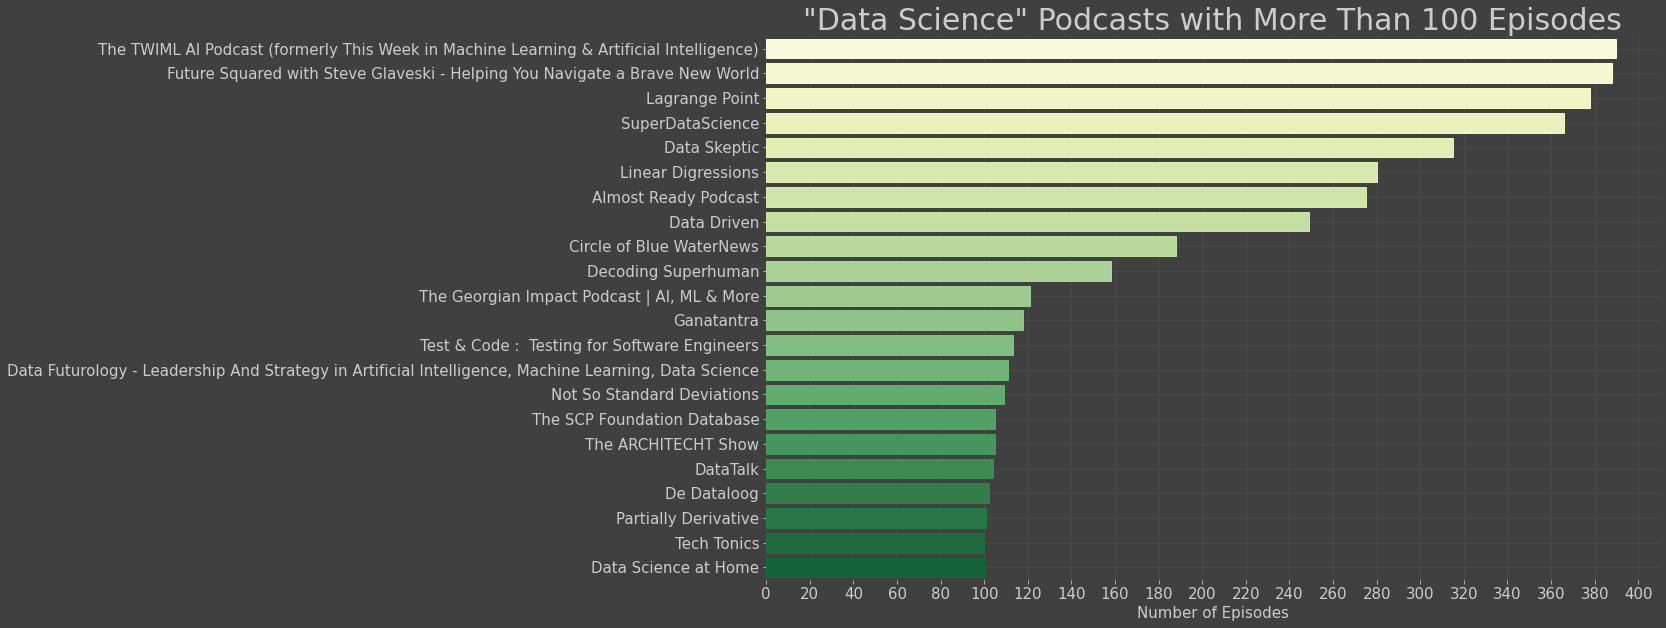

In [1554]:

plt.figure(figsize=(16,10))

cmap = sns.color_palette("YlGn", 25)

ax = sns.barplot(x = podcasts_top100.show_name , y = podcasts_top100.index , data = podcasts_top100, orient = 'h', palette=cmap, edgecolor=cmap)

plt.xticks(np.arange(0, 420, 20), size=15)
plt.yticks(size=15)
plt.ylabel('')
plt.title('"Data Science" Podcasts with More Than 100 Episodes',fontsize=30)
plt.xlabel('Number of Episodes', fontsize=15)
plt.grid(color='#4d4d4d')
sns.despine(bottom=True, left=True)

plt.show()

In [1489]:
# convert milliseconds to minutes (rounded)

all_episodes['length(ms)'] = round((all_episodes['length(ms)'] / 1000)/60, 0).astype(int)

In [1490]:
# change column name to minutes

all_episodes.rename(columns = {'length(ms)':'length(m)'}, inplace = True)

In [1491]:
all_episodes

,show_name,episode_id,length(m),date,episode_name,description
0,Towards Data Science,4DKphli6kcMKZio8ccKXoW,41,2020-05-13,33. Roland Memisevic - Machines that can see a...,One of the most interesting recent trends in m...
1,Towards Data Science,2HWkpJcfAABzDW2HHVxsAj,44,2020-05-06,32. Bahador Khaleghi - Explainable AI and AI i...,If I were to ask you to explain why you’re rea...
2,Towards Data Science,4Dhzr3lCWzDMe1OrUGjryP,41,2020-04-29,31. Russell Pollari - Building habits and brea...,Most of us want to change our identities. And ...
3,Towards Data Science,0tHoeY76I5WBxcetcugZDZ,43,2020-04-22,30. Interviewing the Medium data science team,"Revenues drop unexpectedly, and management pul..."
4,Towards Data Science,48XCjB7RhQaP5XgpKbPJFd,40,2020-04-15,29. Cameron Davidson-Pillon - Data science at ...,If you want to know where data science is head...
...,...,...,...,...,...,...
8469,Tasos Random Sound Experience,6kFuqKeDUgY3R4gf9xBErP,5,2017-12-20,Galactic President's Power,The power of the president of the Imperial Gal...
8470,Tasos Random Sound Experience,7nTTZ56XEFTPqw4FRANKKO,7,2017-12-13,TasCast Show - Day 3,Enjoy my daily podcast. To find the permanent ...
8471,Journey To The Edge Of Machine Learning,5oYC0rWqgvhlIfUvzE5Sjh,6,2020-04-18,Why is there a SQUARED loss in Linear regression?,"I am reading this new book ""The hundred page m..."
8472,The BTO Podcast,2iGu5qSL8aRzWmx61CgGSJ,8,2020-05-18,001 - Stop to watch (with Martin Shaw),"This short podcast, narrated by actor, Martin ..."


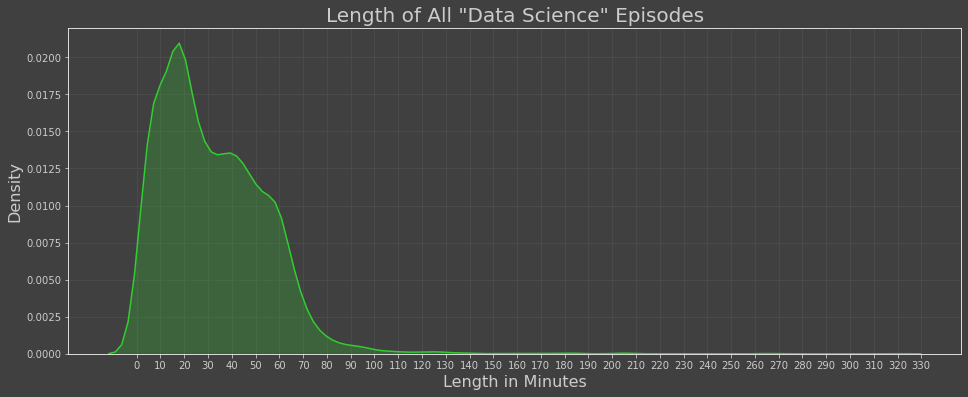

In [1555]:
# length distribution

plt.figure(figsize=(16,6))

sns.kdeplot(all_episodes['length(m)'], shade = True, color = 'limegreen', legend = False )

plt.title('Length of All "Data Science" Episodes', fontsize = 20)
plt.xlabel('Length in Minutes', fontsize=16)
plt.xticks(np.arange(0, 340, 10), size=10)
plt.ylabel('Density', fontsize=16)
plt.grid(color='#4d4d4d')
plt.show()

In [1564]:
# get the average episode length for each show

show_length = all_episodes.groupby('show_name').mean().sort_values('length(m)', ascending=False)


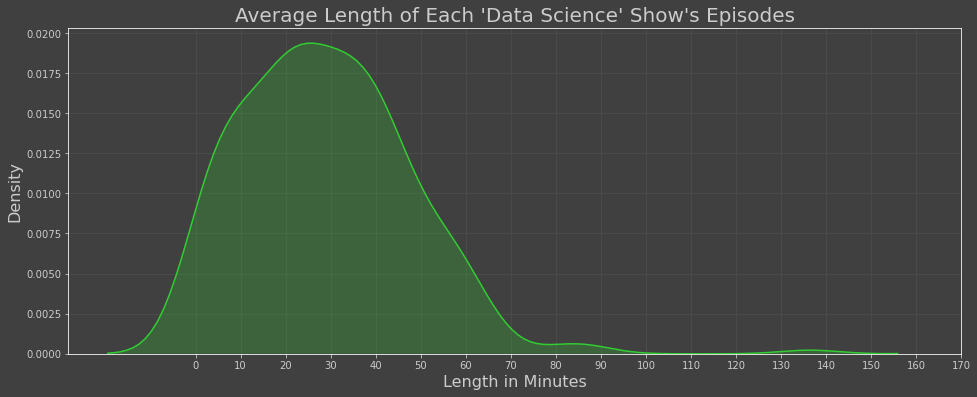

In [1565]:
# avg length distribution


plt.figure(figsize=(16,6))

sns.kdeplot(show_length['length(m)'], shade = True, color = 'limegreen', legend= False )

plt.title("Average Length of Each 'Data Science' Show's Episodes", fontsize = 20)
plt.xlabel('Length in Minutes', fontsize=16)
plt.xticks(np.arange(0, 180, 10), size=10)
plt.ylabel('Density', fontsize=16)
plt.grid(color='#4d4d4d')
plt.show()

In [1495]:
# slice the top 20

show_length = show_length.iloc[0:20]


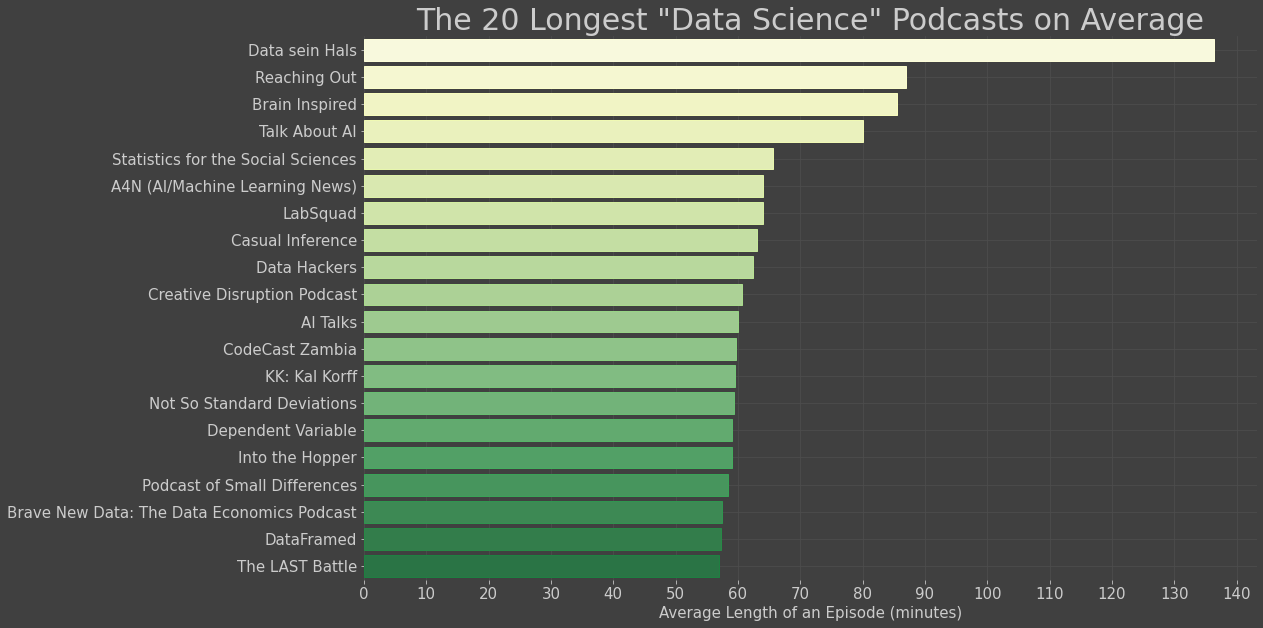

In [1557]:
plt.figure(figsize=(16,10))

cmap = sns.color_palette("YlGn", 25)

ax = sns.barplot(x = show_length['length(m)'] , y = show_length.index , data = show_length, orient = 'h', palette=cmap, edgecolor=cmap)

plt.xticks(np.arange(0, 150, 10), size=15)
plt.yticks(size=15)
plt.ylabel('')
plt.title('The 20 Longest "Data Science" Podcasts on Average',fontsize=30)
plt.xlabel('Average Length of an Episode (minutes)', fontsize=15)
plt.grid(color='#4d4d4d')
sns.despine(bottom=True, left=True)

plt.show()

In [1497]:
# convert date to datetime

all_episodes['date'] = pd.to_datetime(all_episodes['date'])

In [1498]:
# set the index

all_episodes.index = all_episodes['date']

In [1499]:
# get the total by month

month_count = all_episodes.resample('M').count()


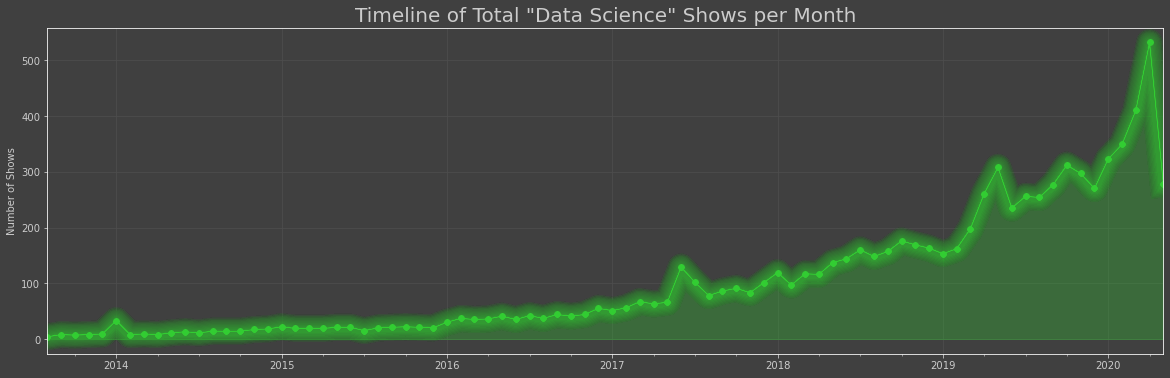

In [1558]:


fig, ax1 = plt.subplots(figsize=(20,6))

n_shades = 10
diff_linewidth = 2.5
alpha_value = 0.2 / n_shades


ax1 = month_count.plot(marker='o', y= 'date', ax=ax1, color='limegreen', legend=False)

for n in range(1, n_shades+1):
    month_count.plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, ax=ax1, legend=False, color='limegreen')

plt.fill_between(x=month_count.index, y1=month_count['date'].values, y2=[0] * len(month_count), color='limegreen', alpha=0.3)    

plt.ylabel('Number of Shows')
plt.xlabel('')
plt.title('Timeline of Total "Data Science" Shows per Month', fontsize=20)
plt.grid(color='#4d4d4d')

plt.show()


In [1510]:
# get the total by year and reset index

year_count = all_episodes.resample('Y').count()
year_count = year_count['show_name']
year_count = year_count.reset_index(drop=True)

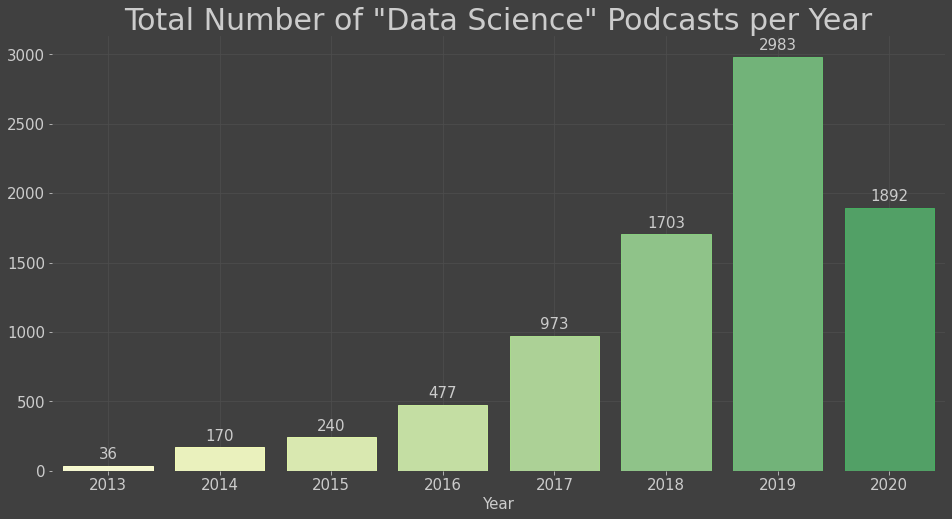

In [1559]:

plt.figure(figsize=(16,8))

year = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

cmap = sns.color_palette("YlGn", 12)

g = sns.barplot(x = year , y = year_count.values , data = year_count, orient = 'v', palette=cmap, edgecolor=cmap)

plt.xticks(np.arange(0, 8, 1), size=15)
plt.yticks(size=15)
plt.ylabel('')
plt.title('Total Number of "Data Science" Podcasts per Year',fontsize=30)
plt.xlabel('Year', fontsize=15)
plt.grid(color='#4d4d4d')
sns.despine(bottom=True, left=True)


for index, row in year_count.iteritems():
    g.text(index  , row + 50, row, color='#cccccc', ha="center", fontsize=15)


plt.show()

In [1355]:
# get only episodes in 2020

all_episodes_2020 = all_episodes[all_episodes['date'].dt.strftime('%Y') == '2020']

In [1356]:
# get total for each day

all_episodes_2020 = all_episodes_2020.resample('D').count()

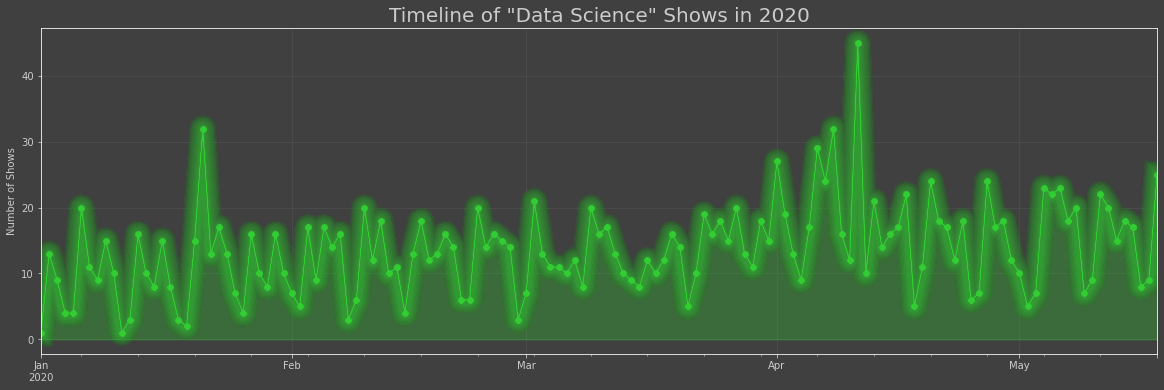

In [1561]:


fig, ax1 = plt.subplots(figsize=(20,6))

n_shades = 10
diff_linewidth = 2.5
alpha_value = 0.2 / n_shades


ax1 = all_episodes_2020.plot(marker='o', y= 'date', ax=ax1, color='limegreen', legend=False)

for n in range(1, n_shades+1):
    all_episodes_2020.plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, ax=ax1, legend=False, color='limegreen')

plt.fill_between(x=all_episodes_2020.index, y1=all_episodes_2020['date'].values, y2=[0] * len(all_episodes_2020), color='limegreen', alpha=0.3)    

plt.ylabel('Number of Shows')
plt.xlabel('')
plt.title('Timeline of "Data Science" Shows in 2020', fontsize=20)
plt.grid(color='#4d4d4d')

plt.show()

In [1370]:
# get total for each day

weekday = all_episodes.resample('D').count()

In [1379]:
# set index to day of the week

weekday['weekday'] = weekday.index.day_name()

In [1387]:
# get the total number of episode per day and reorder the index

weekday_total = weekday.groupby('weekday').sum()
weekday_total = weekday_total.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [1541]:
# reset the index

weekday_total = weekday_total.reset_index()

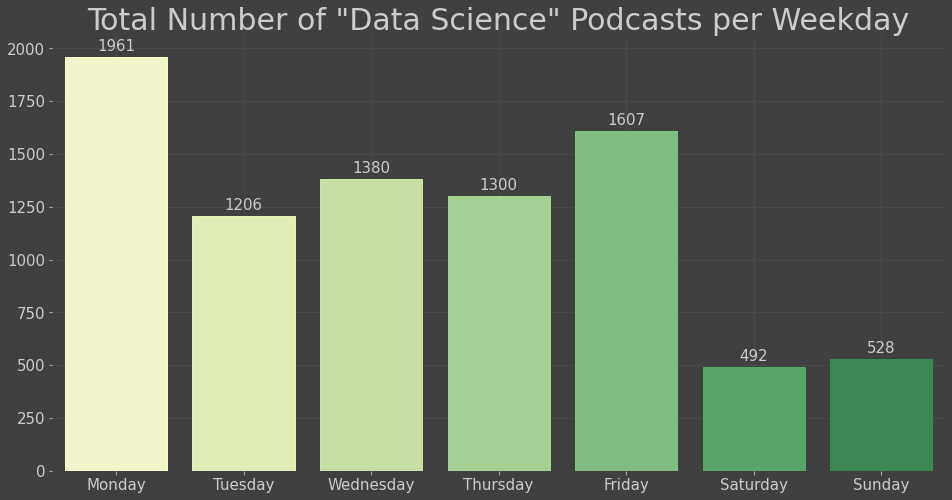

In [1562]:

plt.figure(figsize=(16,8))

cmap = sns.color_palette("YlGn", 9)

g = sns.barplot(x = weekday_total.weekday , y = weekday_total['date'].values , data = weekday_total, orient = 'v', palette=cmap, edgecolor=cmap)

plt.xticks(np.arange(0, 7, 1), size=15)
plt.yticks(size=15)
plt.ylabel('')
plt.title('Total Number of "Data Science" Podcasts per Weekday',fontsize=30)
plt.xlabel('')
plt.grid(color='#4d4d4d')
sns.despine(bottom=True, left=True)

for index, row in weekday_total['date'].iteritems():
    g.text(index  , row + 30, row, color='#cccccc', ha="center", fontsize=15)

plt.show()

In [1526]:
# get the average number of shows per weekday and reorder 

weekday_avg = weekday.groupby('weekday').mean()
weekday_avg = weekday_avg.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [1548]:
# reset the index

weekday_avg = weekday_avg.reset_index()

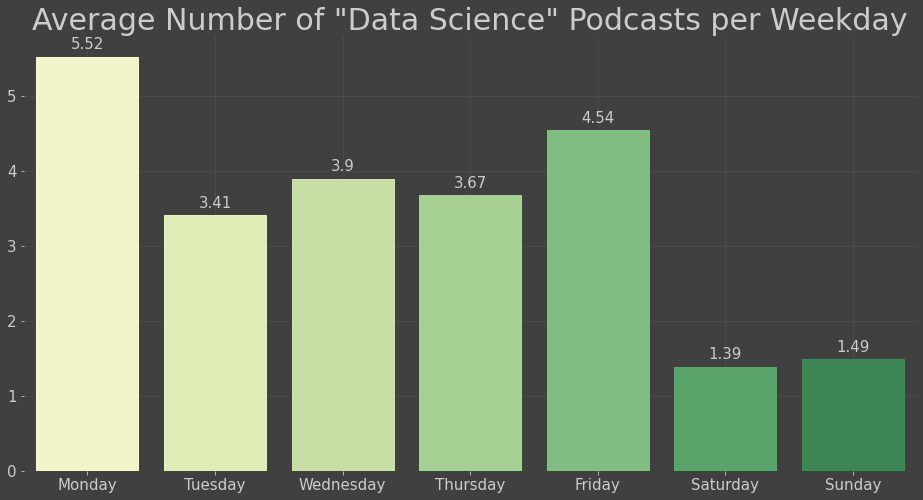

In [1563]:

plt.figure(figsize=(16,8))

cmap = sns.color_palette("YlGn", 9)

g = sns.barplot(x = weekday_avg.weekday , y = weekday_avg['date'].values , data = weekday_avg, orient = 'v', palette=cmap, edgecolor=cmap)

plt.xticks(np.arange(0, 7, 1), size=15)
plt.yticks(size=15)
plt.ylabel('')
plt.title('Average Number of "Data Science" Podcasts per Weekday',fontsize=30)
plt.xlabel('')
plt.grid(color='#4d4d4d')
sns.despine(bottom=True, left=True)

for index, row in weekday_avg['date'].iteritems():
    g.text(index  , row + 0.1, round(row, 2), color='#cccccc', ha="center", fontsize=15)

plt.show()

# Text Generation

In [1025]:
# create wordbank from descriptions

wordbank = all_episodes['description'].unique()

wordbank 

array(['One of the most interesting recent trends in machine learning has been the combination of different types of data in order to be able to unlock new use cases for deep learning. If the 2010s were the decade of computer vision and voice recognition, the 2020s may very well be the decade we finally figure out how to make machines that can see and hear the world around them, making them that much more context-aware and potentially even humanlike. The push towards integrating diverse data sources has received a lot of attention, from academics as well as companies. And one of those companies is Twenty Billion Neurons, and its founder Roland Memisevic, is our guest for this latest episode of the Towards Data Science podcast. Roland is a former academic who’s been knee-deep in deep learning since well before the hype that was sparked by AlexNet in 2012. His company has been working on deep learning-powered developer tools, as well as an automated fitness coach that combines video and 

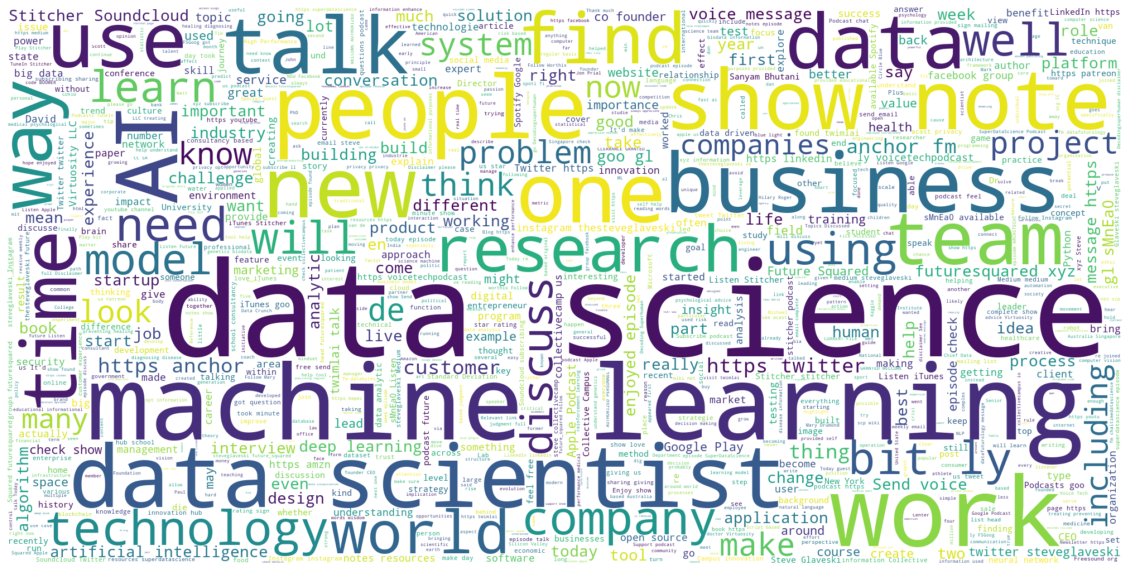

In [1028]:
# build a word cloud

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=1000, width=2000, height=1000).generate(' '.join(str(word) for word in wordbank))

# display the word cloud

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Image opened and saved!


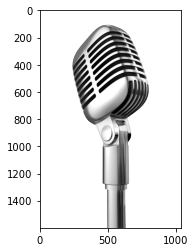

In [1050]:
# open image (just make sure it's in your working directory) and save mask to book

mic = np.array(PIL.Image.open('mic.png'))

imshow(mic)

print('Image opened and saved!')

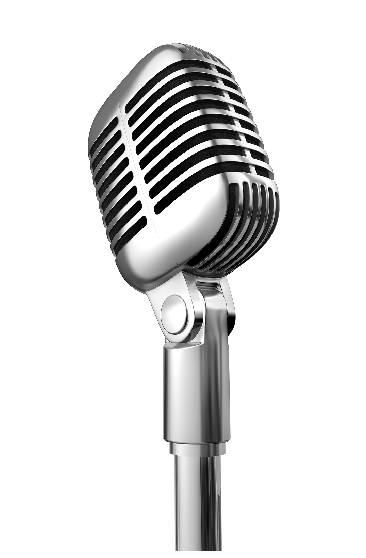

In [1051]:
# display mask image

fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

plt.imshow(mic, cmap=plt.cm.gray, interpolation='None')
plt.axis('off')
plt.show()

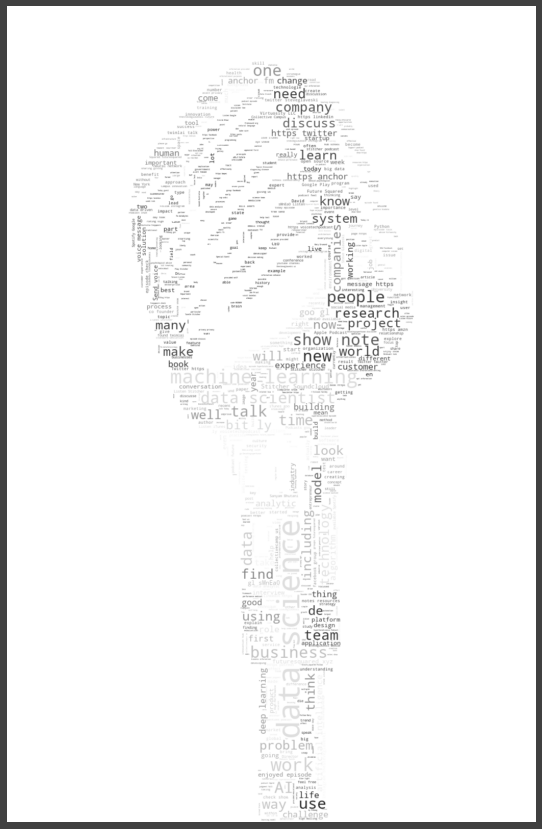

In [1080]:
# create a beautiful wordcloud

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=3000, mask=mic,
               stopwords=stopwords, max_font_size=60, random_state=42)
# generate word cloud
wc.generate(' '.join(wordbank))

# create coloring from image
image_colors = ImageColorGenerator(mic)

# show
plt.figure(figsize=(15, 15))

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

plt.axis('off')

plt.show()

In [1414]:
# format text to lowercase and remove any numbers, reset the index

all_episodes = all_episodes.reset_index(drop=True)

text = all_episodes['description'].str.lower()
text = text.str.replace('\d+', '')
text = text.astype('str')
text

0       one of the most interesting recent trends in m...
1       if i were to ask you to explain why you’re rea...
2       most of us want to change our identities. and ...
3       revenues drop unexpectedly, and management pul...
4       if you want to know where data science is head...
                              ...                        
8469    the power of the president of the imperial gal...
8470    enjoy my daily podcast. to find the permanent ...
8471    i am reading this new book "the hundred page m...
8472    this short podcast, narrated by actor, martin ...
8473    welcome to the what supp show, a podcast dedic...
Name: description, Length: 8474, dtype: object

In [1415]:
# create 5 models

text_model_1 = markovify.NewlineText(text, state_size = 3)
text_model_2 = markovify.NewlineText(text, state_size = 3)
text_model_3 = markovify.NewlineText(text, state_size = 3)
text_model_4 = markovify.NewlineText(text, state_size = 3)
text_model_5 = markovify.NewlineText(text, state_size = 3)

In [1455]:
# create model ensemble and generate 10 new episode descriptions

model_combo = markovify.combine([ text_model_1, text_model_2, text_model_3, text_model_4, text_model_5 ], [ 1, 1, 1, 1, 1])

# Print randomly-generated sentences using the built model

for idx, i in enumerate(range(10)):
    print('(',idx+1,')','   ', model_combo.make_sentence(tries=10000, max_overlap_ratio = 0.2, test_output= True))

( 1 )     in this episode, i'm joined by karl mamer to discuss the concept of corporate innovation, how companies from asia pacific are thinking about starting a side hustle. we explored the psychology of innovation as well as the optimization to actually get answers which questions are helpful during tech interviews, to learn about what the company learned after a prolonged database incident in . this is hotspots podcast episode .
( 2 )     kinesiologist, ambrose coleman hosts an intimate and in-depth conversation with the one and only, scott belsky. topics discussed: why you should be focusing on during the pandemic? skills mandatory for msls during and after a brief hiatus, the industrial ai series, features my interview with bonsai co-founder and ceo of business science. matt is a software developer that wants to do away with something we all despise, traffic. check out the complete show notes page at twimlai.com/talk/.
( 3 )      carrie green is the founder of dataoragami.net whic